<a href="https://colab.research.google.com/github/kmcshane811/AutoML/blob/main/Cat_%26_Dog_Audio_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This page is generated from the corresponding jupyter notebook, that can be found on [this folder](https://github.com/fastaudio/fastaudio/tree/master/docs)

To install the library, uncomment and run this cell:

In [ ]:
!pip install git+https://github.com/fastaudio/fastaudio.git
!pip install git+https://github.com/fastai/fastai/tree/v2.0-branch
!pip install -Uqq fastbook

import fastbook
fastbook.setup_book()
from fastbook import *

  Cloning https://github.com/fastaudio/fastaudio.git to /tmp/pip-req-build-xvqz8kh6
  Running command git clone -q https://github.com/fastaudio/fastaudio.git /tmp/pip-req-build-xvqz8kh6
  Created wheel for fastaudio: filename=fastaudio-0.1.4.post0.dev2+g8631a3f-py2.py3-none-any.whl size=18329 sha256=1b12c50b9dd8bf98de7daed515daea74b506dfae838c5bbe10b93580a90430f9
  Stored in directory: /tmp/pip-ephem-wheel-cache-55prread/wheels/20/af/b1/ea2a6d91971f5e3f435c6a0aa2ae8b7a010b644cc01e24b0ce
Successfully built fastaudio
  Cloning https://github.com/fastai/fastai/tree/v2.0-branch to /tmp/pip-req-build-s90wr_5y
  Running command git clone -q https://github.com/fastai/fastai/tree/v2.0-branch /tmp/pip-req-build-s90wr_5y
  fatal: repository 'https://github.com/fastai/fastai/tree/v2.0-branch/' not found
ERROR: Command errored out with exit status 128: git clone -q https://github.com/fastai/fastai/tree/v2.0-branch /tmp/pip-req-build-s90wr_5y Check the logs for full command output.
Mounted at /cont

**COLAB USERS: Before you continue and import the lib, go to the `Runtime` menu and select `Restart Runtime`.**

In [ ]:
from fastai.vision.all import *
from fastai.vision.all import cnn_learner
from fastaudio.core.all import *
from fastaudio.augment.all import *
from fastaudio.ci import skip_if_ci

/usr/local/lib/python3.6/dist-packages/torchaudio/backend/utils.py:54: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  '"sox" backend is being deprecated. '


In [ ]:
from google.colab import files
! pip install -q kaggle
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
from kaggle import api 
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
! mkdir freesound
! kaggle datasets download -d mmoreaux/audio-cats-and-dogs


Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                       title                                         size  lastUpdated          downloadCount  
--------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-wallstreetsbets-posts                       Reddit WallStreetBets Posts                    7MB  2021-02-15 06:07:04            913  
michau96/restaurant-business-rankings-2020                Restaurant Business Rankings 2020             16KB  2021-01-30 14:20:45           1311  
yorkehead/stock-market-subreddits                         Stock Market Subreddits                        1MB  2021-01-29 13:53:50            163  
aagghh/crypto-telegram-groups                             Crypto telegram groups                       297MB  2021-02-02 09:58:25            120  
timoboz/superbowl-histor

In [ ]:
! unzip audio-cats-and-dogs.zip -d audio

Archive:  audio-cats-and-dogs.zip
  inflating: audio/cats_dogs/cat_1.wav  
  inflating: audio/cats_dogs/cat_10.wav  
  inflating: audio/cats_dogs/cat_100.wav  
  inflating: audio/cats_dogs/cat_101.wav  
  inflating: audio/cats_dogs/cat_102.wav  
  inflating: audio/cats_dogs/cat_103.wav  
  inflating: audio/cats_dogs/cat_105.wav  
  inflating: audio/cats_dogs/cat_106.wav  
  inflating: audio/cats_dogs/cat_107.wav  
  inflating: audio/cats_dogs/cat_108.wav  
  inflating: audio/cats_dogs/cat_109.wav  
  inflating: audio/cats_dogs/cat_11.wav  
  inflating: audio/cats_dogs/cat_110.wav  
  inflating: audio/cats_dogs/cat_112.wav  
  inflating: audio/cats_dogs/cat_113.wav  
  inflating: audio/cats_dogs/cat_114.wav  
  inflating: audio/cats_dogs/cat_115.wav  
  inflating: audio/cats_dogs/cat_116.wav  
  inflating: audio/cats_dogs/cat_117.wav  
  inflating: audio/cats_dogs/cat_118.wav  
  inflating: audio/cats_dogs/cat_119.wav  
  inflating: audio/cats_dogs/cat_12.wav  
  inflating: audio/cats_d

In [ ]:
files.upload()

Saving train_test_split#1.csv to train_test_split#1.csv


{'train_test_split#1.csv': b',filename,category\r\n0,cat_22.wav,cat\r\n1,cat_116.wav,cat\r\n2,cat_155.wav,cat\r\n3,cat_58.wav,cat\r\n4,cat_77.wav,cat\r\n5,cat_144.wav,cat\r\n6,cat_49.wav,cat\r\n7,cat_38.wav,cat\r\n8,cat_5.wav,cat\r\n9,cat_2.wav,cat\r\n10,cat_55.wav,cat\r\n11,cat_166.wav,cat\r\n12,cat_52.wav,cat\r\n13,cat_94.wav,cat\r\n14,cat_83.wav,cat\r\n15,cat_60.wav,cat\r\n16,cat_70.wav,cat\r\n17,cat_45.wav,cat\r\n18,cat_29.wav,cat\r\n19,cat_149.wav,cat\r\n20,cat_50.wav,cat\r\n21,cat_46.wav,cat\r\n22,cat_89.wav,cat\r\n23,cat_65.wav,cat\r\n24,cat_13.wav,cat\r\n25,cat_125.wav,cat\r\n26,cat_136.wav,cat\r\n27,cat_53.wav,cat\r\n28,cat_12.wav,cat\r\n29,cat_20.wav,cat\r\n30,cat_21.wav,cat\r\n31,cat_8.wav,cat\r\n32,cat_59.wav,cat\r\n33,cat_150.wav,cat\r\n34,cat_47.wav,cat\r\n35,cat_112.wav,cat\r\n36,cat_160.wav,cat\r\n37,cat_66.wav,cat\r\n38,cat_9.wav,cat\r\n39,cat_138.wav,cat\r\n40,cat_106.wav,cat\r\n41,cat_141.wav,cat\r\n42,cat_67.wav,cat\r\n43,cat_24.wav,cat\r\n44,cat_117.wav,cat\r\n45,c

Opening the metadata file (For this particular model, the csv file must contain a filename and category (aka label) column.

In [ ]:
df = pd.read_csv('/content/train_test_split#1.csv')
df.head()


,Unnamed: 0,filename,category
0,0.0,cat_22.wav,cat
1,1.0,cat_116.wav,cat
2,2.0,cat_155.wav,cat
3,3.0,cat_58.wav,cat
4,4.0,cat_77.wav,cat


## Datablock and Dataloader preparation

Creating the Audio to Spectrogram transform from a predefined config & resize the samples to the same length.

In [ ]:
cfg = AudioConfig.BasicMelSpectrogram(n_fft=512)
a2s = AudioToSpec.from_cfg(cfg)
item_tfms = [ResizeSignal(1000),a2s]

/usr/local/lib/python3.6/dist-packages/torchaudio/functional.py:318: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (257) may be set too low.
  "At least one mel filterbank has all zero values. "


Creating the Datablock

In [ ]:
auds = DataBlock(blocks = (AudioBlock, CategoryBlock), 
                 get_x = ColReader("filename", pref='/content/audio/cats_dogs/'), 
                 splitter = TrainTestSplitter(test_size=0.2, random_state=42, stratify=None, train_size=0.4, shuffle=True),
                 item_tfms = item_tfms,
                 get_y = ColReader('category'))

In [ ]:
dbunch = auds.dataloaders(df, bs=64)

/usr/local/lib/python3.6/dist-packages/torch/functional.py:516: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:653.)
  normalized, onesided, return_complex)
/usr/local/lib/python3.6/dist-packages/torch/functional.py:516: UserWarning: The function torch.rfft is deprecated and will be removed in a future PyTorch release. Use the new torch.fft module functions, instead, by importing torch.fft and calling torch.fft.fft or torch.fft.rfft. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:590.)
  normalized, onesided, return_complex)


Visualizing one batch of data. Notice that the title of each Spectrogram is the corresponding label.

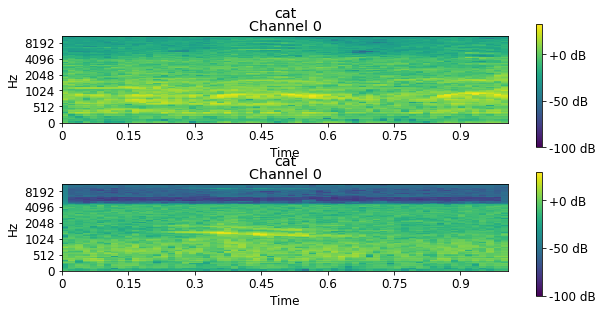

In [ ]:
dbunch.show_batch(figsize=(10, 5))

## Learner and Training

While creating the learner, we need to indicate that our input spectrograms only have one channel. Besides that, it's the usual vision learner.

In [ ]:
learn = cnn_learner(dbunch, 
            resnet18,
            n_in=1,  # <- This is the only audio specific modification here
            loss_func=CrossEntropyLossFlat(),
            metrics=[accuracy])

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
@skip_if_ci
def run_learner():
    # epochs are a bit longer due to the chosen melspectrogram settings
    learn.fine_tune(10)

# We only validate the model when running in CI
run_learner()

epoch,train_loss,valid_loss,accuracy,time
0,0.871129,0.762726,0.642857,00:01


epoch,train_loss,valid_loss,accuracy,time
0,1.147979,0.961481,0.678571,00:01
1,1.130270,0.874225,0.625000,00:01
2,1.116069,0.889959,0.625000,00:01
3,1.057462,0.666720,0.696429,00:01
4,0.981334,0.574900,0.696429,00:01
5,0.942783,0.554376,0.750000,00:01
6,0.876916,0.357714,0.875000,00:01
7,0.823665,0.648525,0.678571,00:01
8,0.795140,0.393703,0.803571,00:01
9,0.766407,0.381204,0.803571,00:01


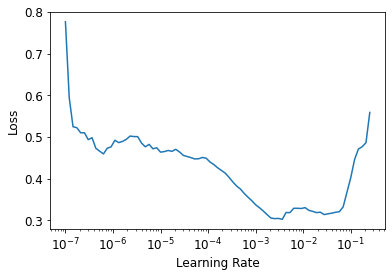

In [ ]:
lr_min, lr_steep = learn.lr_find()

In [ ]:
learn.fine_tune(1, base_lr = 5e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.141310,0.326403,0.892857,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.081663,0.274302,0.928571,00:01


In [ ]:
learn.export()